In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bsmcalls import individuals,readVCF
import attila_utils
plt.rcParams['figure.dpi'] = 200

In [2]:
fpath = '../../resources/VAF/scz_snv_vova2.csv'
calls = pd.read_csv(fpath)
calls

,CHROM,POS,REF,ALT,AF,DP,mean_cov,Individual ID,subjectID
0,1,11973569,C,T,0.02,199,256.144,CMC_MSSM_027,MSSM_027
1,1,67324428,A,T,0.06,196,256.144,CMC_MSSM_027,MSSM_027
2,1,182008461,C,T,0.06,167,256.144,CMC_MSSM_027,MSSM_027
3,1,207598957,C,T,0.06,195,256.144,CMC_MSSM_027,MSSM_027
4,1,219342012,C,T,0.02,216,256.144,CMC_MSSM_027,MSSM_027
...,...,...,...,...,...,...,...,...,...
3279,9,139251813,G,A,0.02,203,249.098,CMC_PITT_118,PITT_118
3280,9,139721837,G,A,0.18,227,249.098,CMC_PITT_118,PITT_118
3281,X,5889841,G,A,0.20,237,249.098,CMC_PITT_118,PITT_118
3282,X,71258041,C,T,0.04,207,249.098,CMC_PITT_118,PITT_118


In [3]:
calls.AF.unique()

array([0.02, 0.06, 0.16, 0.04, 0.08, 0.2 , 0.18, 0.14, 0.1 , 0.12, 0.22,
       0.3 , 0.24, 0.26, 0.32, 0.34, 0.28, 0.36, 0.38])

['named-figure/vaf-histogram.png', 'named-figure/vaf-histogram.pdf']

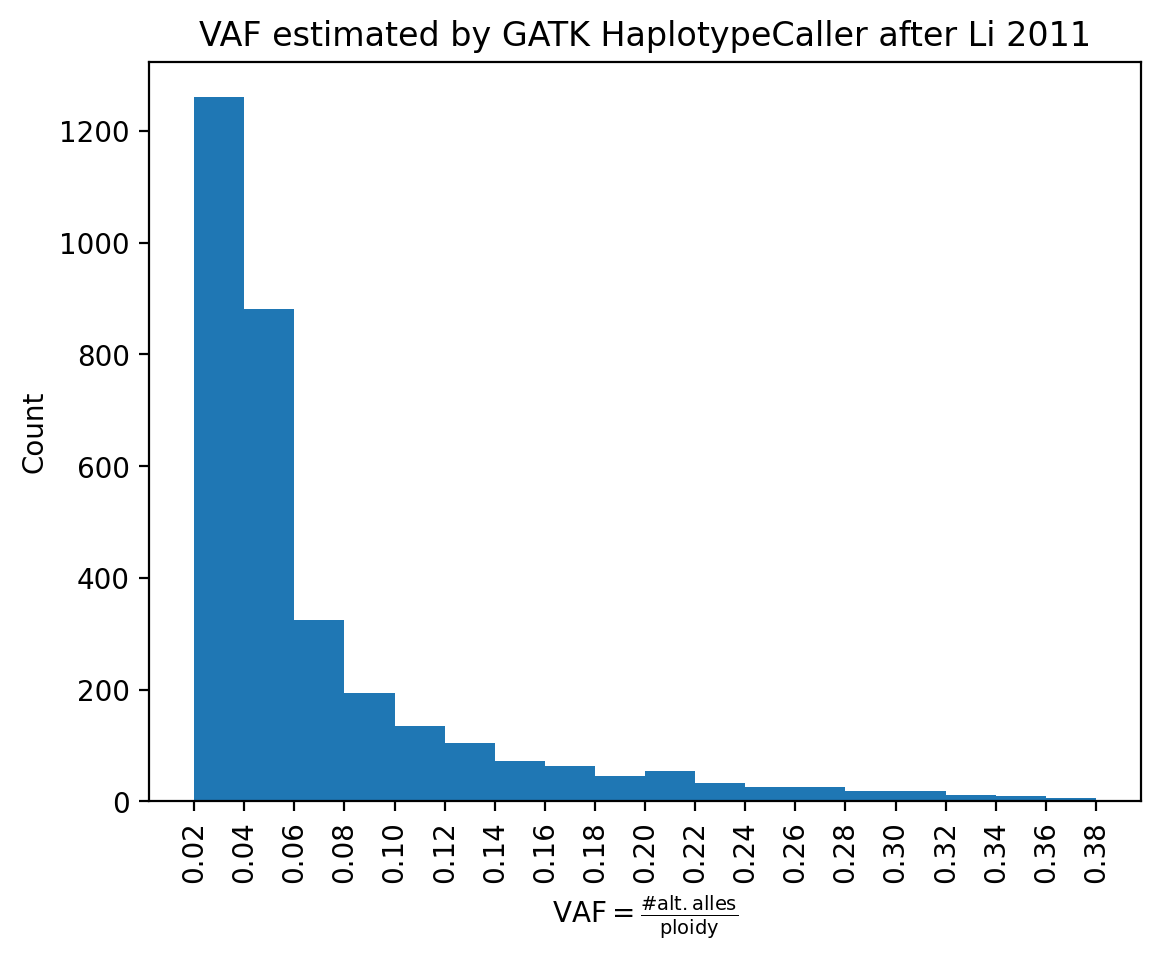

In [4]:
fig, ax = plt.subplots()
ax.hist(calls.AF, bins=np.sort(calls.AF.unique()), histtype='bar')
ax.set_title('VAF estimated by GATK HaplotypeCaller after Li 2011')
ax.set_xlabel(r'$\mathrm{VAF} = \frac{\# \mathrm{alt.alles}}{\mathrm{ploidy}}$')
ax.set_ylabel('Count')
ax.set_xticks(np.sort(calls.AF.unique()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
attila_utils.savefig(fig, 'vaf-histogram')

In [5]:
fpath = '../../resources/VAF/Maury_et_al_callset_CollectAllelicCounts_VAF_and_samtools_mpileup_BQMQ_SZ.csv'
calls1 = pd.read_csv(fpath)
calls1 = calls1.rename({'Individual_ID': 'Individual ID'}, axis=1)
calls1['Mutation'] = calls1.apply(lambda r: r.loc['REF'] + '/' + r.loc['ALT'], axis=1)
calls1 = calls1.set_index(['Individual ID', 'CHROM', 'POS', 'Mutation'])
calls1['- baseQ_mean'] = - calls1.baseQ_mean
calls1['VAF difference'] = calls1.AF - calls1['AllelicCounts_VAF']
calls1

REF ALT    AF   DP AllelicCounts_REF  \
Individual ID CHROM POS       Mutation                                        
CMC_MSSM_027  1     11973569  C/T        C   T  0.02  199                 C   
                    67324428  A/T        A   T  0.06  196                 A   
                    182008461 C/T        C   T  0.06  167                 C   
                    207598957 C/T        C   T  0.06  195                 C   
                    219342012 C/T        C   T  0.02  216                 C   
...                                     ..  ..   ...  ...               ...   
CMC_PITT_118  9     139251813 G/A        G   A  0.02  203                 G   
                    139721837 G/A        G   A  0.18  227                 G   
              X     5889841   G/A        G   A  0.20  237                 G   
                    71258041  C/T        C   T  0.04  207                 C   
                    120533592 C/A        C   A  0.02  223                 C   

                                       AllelicCounts_ALT  AllelicCounts_VAF  \
Individual ID CHROM POS       Mutation                                        
CMC_MSSM_027  1     11973569  C/T                      T             0.0300   
                    67324428  A/T                      T             0.0503   
                    182008461 C/T                      T             0.0588   
                    207598957 C/T                      T             0.0508   
                    219342012 C/T                      T             0.0276   
...                                                  ...                ...   
CMC_PITT_118  9     139251813 G/A                      A             0.0289   
                    139721837 G/A                      A             0.2011   
              X     5889841   G/A                      A             0.1869   
                    71258041  C/T                      T             0.0393   
                    120533592 C/A                      A             0.0160   

                                        AF_minus_VAF  TOTAL_READ_COUNT  \
Individual ID CHROM POS       Mutation                                   
CMC_MSSM_027  1     11973569  C/T            -0.0100               183   
                    67324428  A/T             0.0097               182   
                    182008461 C/T             0.0012               155   
                    207598957 C/T             0.0092               179   
                    219342012 C/T            -0.0076               196   
...                                              ...               ...   
CMC_PITT_118  9     139251813 G/A            -0.0089               156   
                    139721837 G/A            -0.0211               169   
              X     5889841   G/A             0.0131               172   
                    71258041  C/T             0.0007               157   
                    120533592 C/A             0.0040               161   

                                        baseQ_mean  mapQ_mean  - baseQ_mean  \
Individual ID CHROM POS       Mutation                                        
CMC_MSSM_027  1     11973569  C/T        33.535519       60.0    -33.535519   
                    67324428  A/T        35.576923       60.0    -35.576923   
                    182008461 C/T        29.490323       60.0    -29.490323   
                    207598957 C/T        30.810056       60.0    -30.810056   
                    219342012 C/T        30.882653       60.0    -30.882653   
...                                            ...        ...           ...   
CMC_PITT_118  9     139251813 G/A        29.429487       60.0    -29.429487   
                    139721837 G/A        32.544379       60.0    -32.544379   
              X     5889841   G/A        31.581395       60.0    -31.581395   
                    71258041  C/T        30.764331       60.0    -30.764331   
                    120533592 C/A        32.391304       60.0    -32.391

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


['named-figure/baseQ_mean-hist.png', 'named-figure/baseQ_mean-hist.pdf']

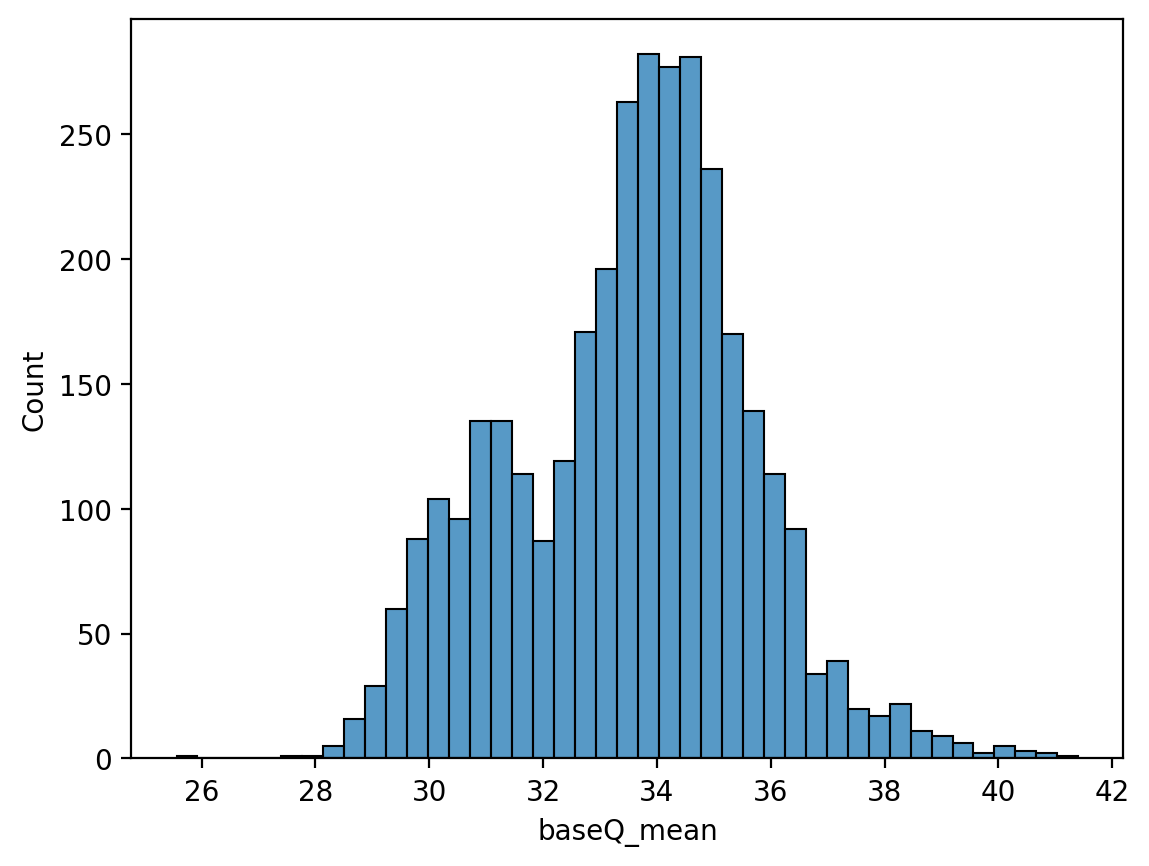

In [6]:
fig, ax = plt.subplots()
sns.histplot(data=calls1.baseQ_mean, ax=ax)
attila_utils.savefig(fig, 'baseQ_mean-hist')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


['named-figure/baseQ_mean-vs-mapQ_mean.png',
 'named-figure/baseQ_mean-vs-mapQ_mean.pdf']

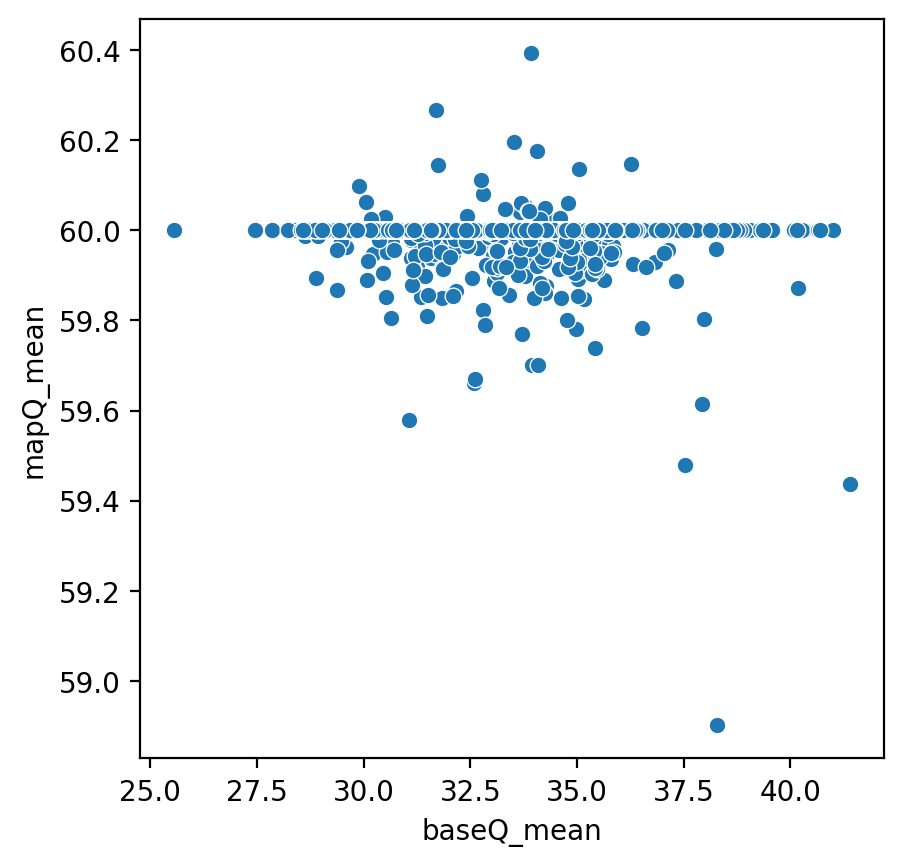

In [7]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=calls1, x='baseQ_mean', y='mapQ_mean', ax=ax)
attila_utils.savefig(fig, 'baseQ_mean-vs-mapQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


['named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean.png',
 'named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean.pdf']

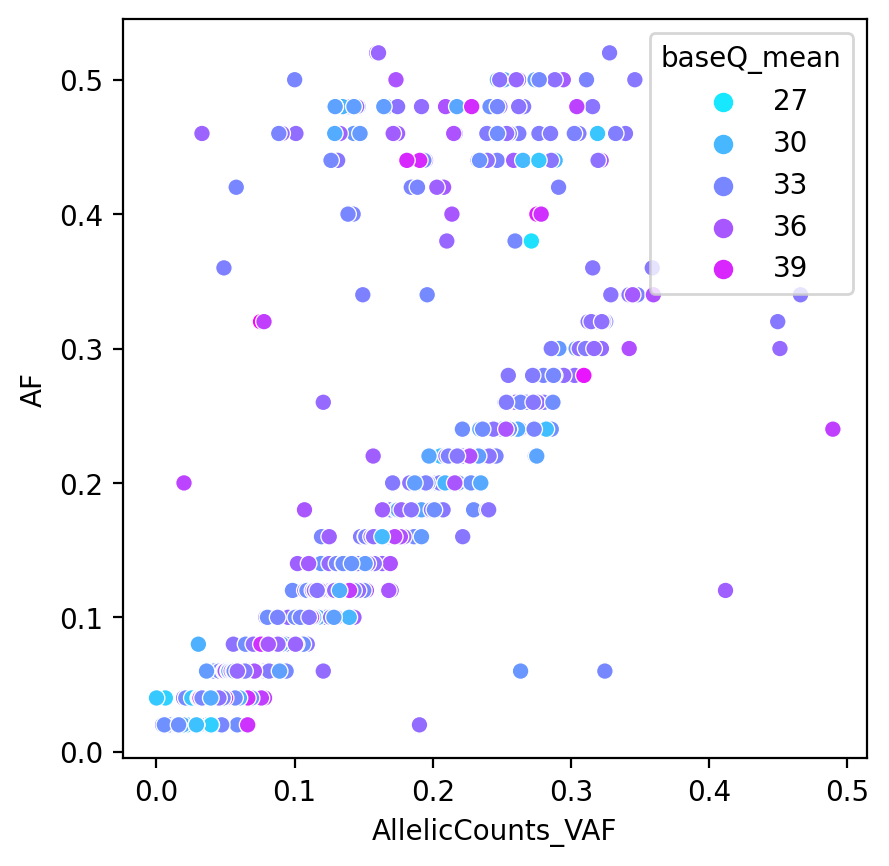

In [8]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=calls1, x='AllelicCounts_VAF', y='AF', hue='baseQ_mean', palette='cool', ax=ax)
attila_utils.savefig(fig, 'AF-vs-AllelicCounts_VAF-baseQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


['named-figure/AF-vs-AllelicCounts_VAF-mapQ_mean.png',
 'named-figure/AF-vs-AllelicCounts_VAF-mapQ_mean.pdf']

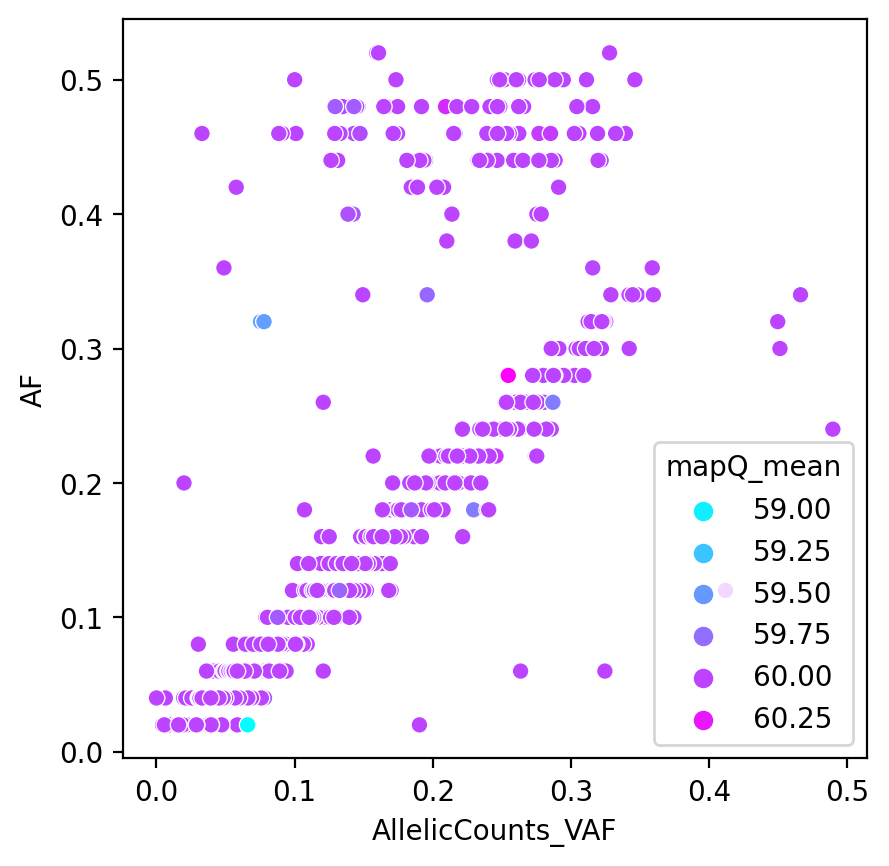

In [9]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
sns.scatterplot(data=calls1, x='AllelicCounts_VAF', y='AF', hue='mapQ_mean', palette='cool', ax=ax)
attila_utils.savefig(fig, 'AF-vs-AllelicCounts_VAF-mapQ_mean')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

['named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean-mapQ_mean.png',
 'named-figure/AF-vs-AllelicCounts_VAF-baseQ_mean-mapQ_mean.pdf']

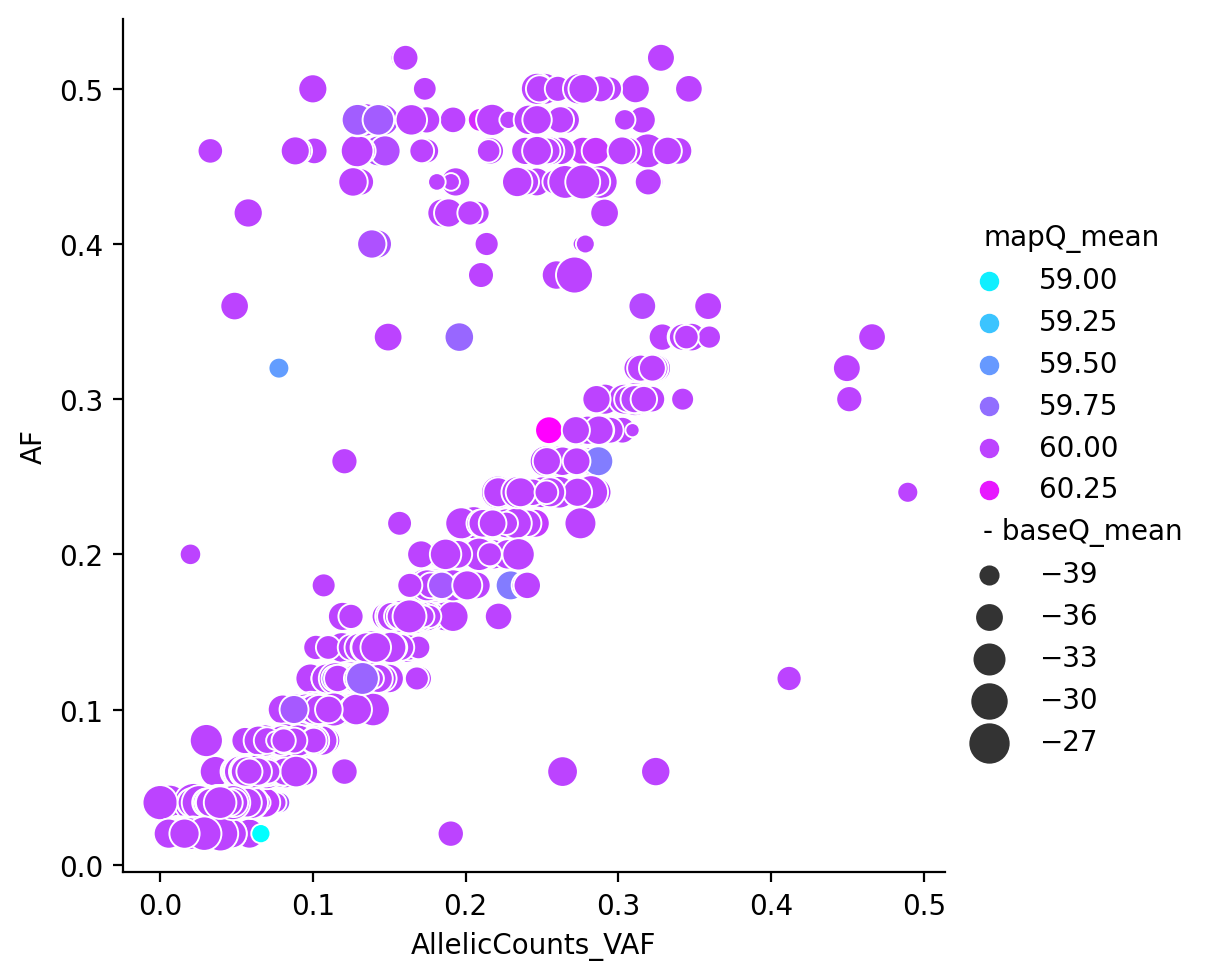

In [10]:
g = sns.relplot(
    data=calls1,
    x="AllelicCounts_VAF", y="AF",
    hue="mapQ_mean", size="- baseQ_mean",
    palette='cool', sizes=(10, 200))
attila_utils.savefig(fig, 'AF-vs-AllelicCounts_VAF-baseQ_mean-mapQ_mean')

## Reading my calls

In [11]:
annotlist = readVCF.read_annotlist(withFORMAT=True)
annotlist

['CHROM',
 'POS',
 'REF',
 'ALT',
 'QUAL',
 'FILTER/PASS',
 'FILTER/HC',
 'FILTER/EXT',
 'FORMAT/AD',
 'FORMAT/DP',
 'FORMAT/GQ',
 'FORMAT/GT',
 'FORMAT/MIN_DP',
 'FORMAT/PL',
 'FORMAT/RGQ',
 'FORMAT/SB',
 'INFO/AC',
 'INFO/AF',
 'INFO/AN',
 'INFO/BaseQRankSum',
 'INFO/DP',
 'INFO/DS',
 'INFO/END',
 'INFO/ExcessHet',
 'INFO/FS',
 'INFO/InbreedingCoeff',
 'INFO/MLEAC',
 'INFO/MLEAF',
 'INFO/MQ',
 'INFO/MQRankSum',
 'INFO/NEGATIVE_TRAIN_SITE',
 'INFO/POSITIVE_TRAIN_SITE',
 'INFO/QD',
 'INFO/RAW_MQandDP',
 'INFO/ReadPosRankSum',
 'INFO/SOR',
 'INFO/VQSLOD',
 'INFO/culprit',
 'INFO/ChromatinState_DLPFC',
 'INFO/szdbCNVcount',
 'INFO/GWASpval']

In [12]:
mycalls = readVCF.readVCFs(annotlist=annotlist)
l = [mycalls['FORMAT/AD'].str.split(',').apply(lambda x: x[i]).astype('int64').to_frame(c) for i, c in zip(range(2), ['REFD', 'ALTD'])]
mycalls = pd.concat([mycalls] + l, axis=1)
mycalls['VAF[reads, BSMN]'] = mycalls.ALTD / (mycalls.ALTD + mycalls.REFD)
mycalls = mycalls.xs('NeuN_pl', level='Tissue', axis=0)
mycalls = pd.concat([mycalls, calls1[['AllelicCounts_REF', 'AllelicCounts_ALT', 'AllelicCounts_VAF']]], axis=1)
mycalls = mycalls.rename({'AllelicCounts_VAF': 'VAF[reads, Harvard]', 'AF': 'VAF[alleles, BSMN]'}, axis=1)
mycalls.to_csv('../../results/2023-10-30-vaf/calls.csv')
mycalls

REF ALT   FILTER/PASS  \
Individual ID CHROM POS       Mutation                         
CMC_MSSM_027  1     11973569  C/T        C   T  HC;PASS/PASS   
                    67324428  A/T        A   T  HC;PASS/PASS   
                    182008461 C/T        C   T  HC;PASS/PASS   
                    207598957 C/T        C   T  HC;PASS/PASS   
                    219342012 C/T        C   T  HC;PASS/PASS   
...                                     ..  ..           ...   
CMC_PITT_118  19    29600767  C/T        C   T  HC;PASS/PASS   
                    58291104  C/T        C   T  HC;PASS/PASS   
              X     5889841   G/A        G   A  HC;PASS/PASS   
                    71258041  C/T        C   T  HC;PASS/PASS   
                    120533592 C/A        C   A  HC;PASS/PASS   

                                        VAF[alleles, BSMN]  BaseQRankSum   DP  \
Individual ID CHROM POS       Mutation                                          
CMC_MSSM_027  1     11973569  C/T                     0.02         0.517  199   
                    67324428  A/T                     0.06        -2.660  196   
                    182008461 C/T                     0.06         1.420  167   
                    207598957 C/T                     0.06         1.040  195   
                    219342012 C/T                     0.02         1.600  216   
...                                                    ...           ...  ...   
CMC_PITT_118  19    29600767  C/T                     0.02         3.680  221   
                    58291104  C/T                     0.04        -1.118  206   
              X     5889841   G/A                     0.20         5.230  237   
                    71258041  C/T                     0.04         1.820  207   
                    120533592 C/A                     0.02         2.430  223   

                                           FS    SOR  VQSLOD culprit  ...  \
Individual ID CHROM POS       Mutation                                ...   
CMC_MSSM_027  1     11973569  C/T       3.742  1.260   19.64      QD  ...   
                    67324428  A/T       1.288  0.390   18.22      QD  ...   
                    182008461 C/T       2.809  1.020   19.41      QD  ...   
                    207598957 C/T       4.608  1.424   19.02      QD  ...   
                    219342012 C/T       0.000  0.997   20.11      QD  ...   
...                                       ...    ...     ...     ...  ...   
CMC_PITT_118  19    29600767  C/T       1.862  0.819   15.63      QD  ...   
                    58291104  C/T       1.465  0.882   15.58      QD  ...   
              X     5889841   G/A       3.815  1.014   18.23      QD  ...   
                    71258041  C/T       0.000  0.941   15.85      QD  ...   
                    120533592 C/A       6.426  1.993    8.97      QD  ...   

                                       FORMAT/DP  FORMAT/GQ  \
Individual ID CHROM POS       Mutation                        
CMC_MSSM_027  1     11973569  C/T            198          0   
                    67324428  A/T            194          1   
                    182008461 C/T            164          2   
                    207598957 C/T            193          1   
                    219342012 C/T            213          4   
...                                          ...        ...   
CMC_PITT_118  19    29600767  C/T            219          4   
                    58291104  C/T            205          2   
              X     5889841   G/A            236          1   
                    71258041  C/T            207          2   
                    120533592 C/A            221          1   

                                                                                FORMAT/GT  \
Individual ID CHROM POS       Mutation                                                      
CMC_MSSM_027  1     11973569  C/T       0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...   
                    67324428  A/T       0/0/0/0/0/0

In [13]:
def my_histplot(data):
    fig, ax = plt.subplots(2, 1, figsize=(6.4, 6.4), sharex=True)
    for axi in ax:
        sns.histplot(data=data, ax=axi, color='red')
        axi.axvline(0)

    ax[1].set_yscale('log')
    ax[1].grid(axis='y', which='both')
    return((fig, ax))

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

['named-figure/VAF-alleles-BSMN-vs-VAF-reads-Harvard.png',
 'named-figure/VAF-alleles-BSMN-vs-VAF-reads-Harvard.pdf']

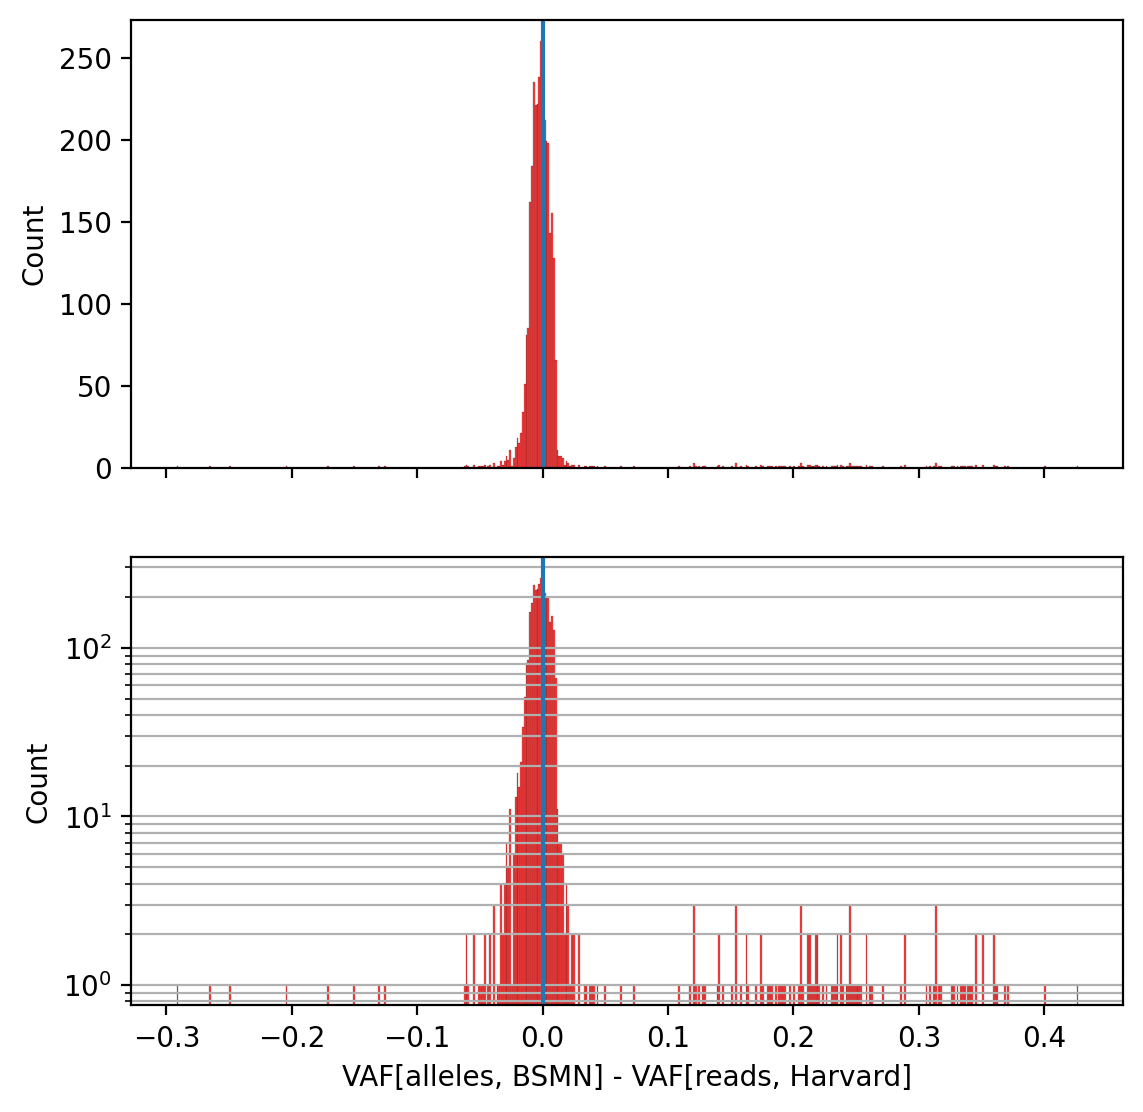

In [14]:
fig, ax = my_histplot(mycalls['VAF[alleles, BSMN]'] - mycalls['VAF[reads, Harvard]'])
ax[1].set_xlabel('VAF[alleles, BSMN] - VAF[reads, Harvard]')
attila_utils.savefig(fig, 'VAF-alleles-BSMN-vs-VAF-reads-Harvard')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

['named-figure/VAF-reads-BSMN-vs-VAF-reads-Harvard.png',
 'named-figure/VAF-reads-BSMN-vs-VAF-reads-Harvard.pdf']

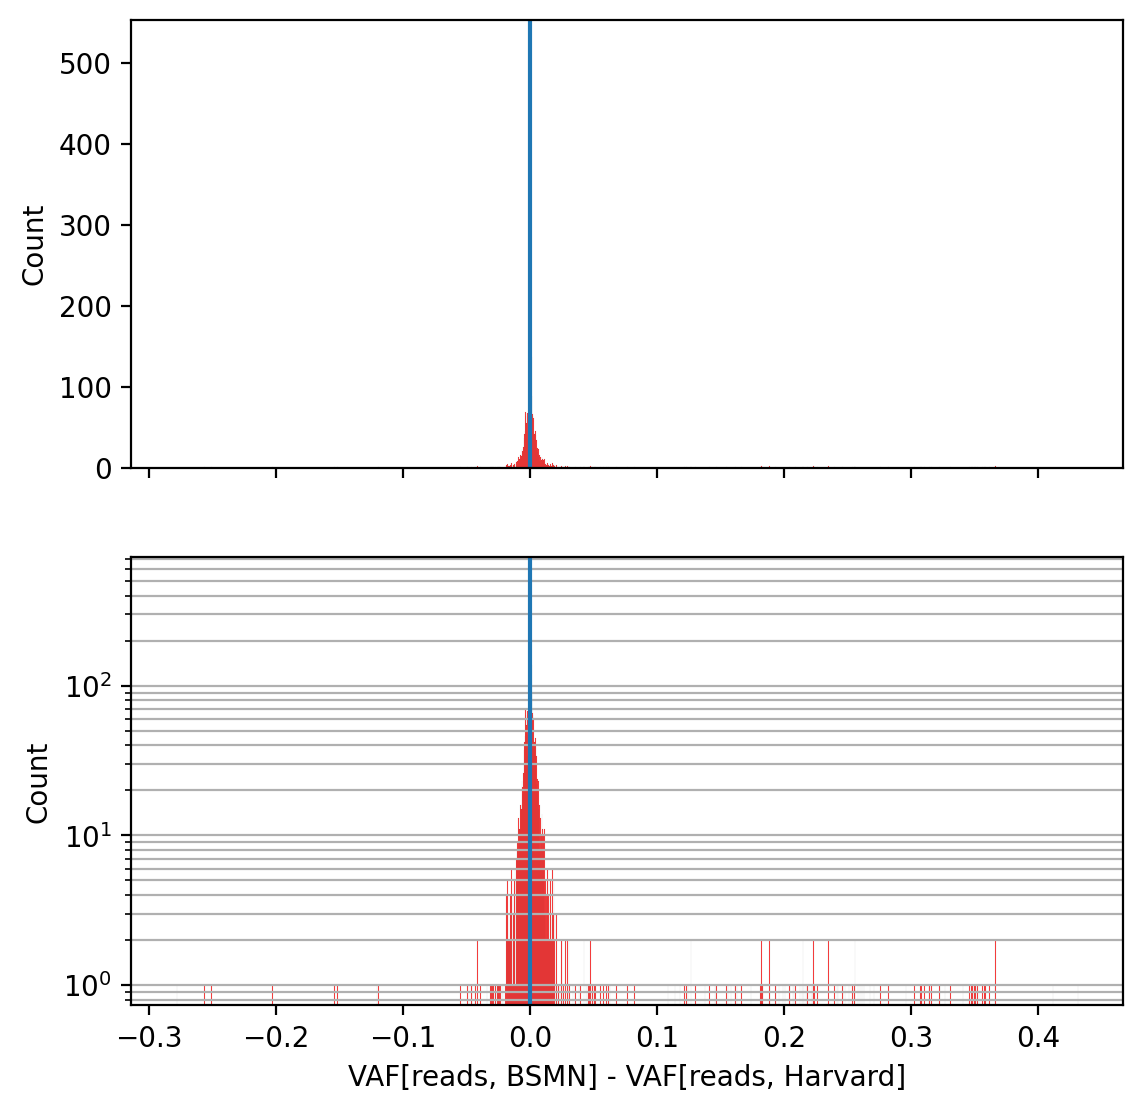

In [15]:
fig, ax = my_histplot(mycalls['VAF[reads, BSMN]'] - mycalls['VAF[reads, Harvard]'])
ax[1].set_xlabel('VAF[reads, BSMN] - VAF[reads, Harvard]')
attila_utils.savefig(fig, 'VAF-reads-BSMN-vs-VAF-reads-Harvard')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

['named-figure/VAF-alleles-BSMN-vs-VAF-reads-BSMN.png',
 'named-figure/VAF-alleles-BSMN-vs-VAF-reads-BSMN.pdf']

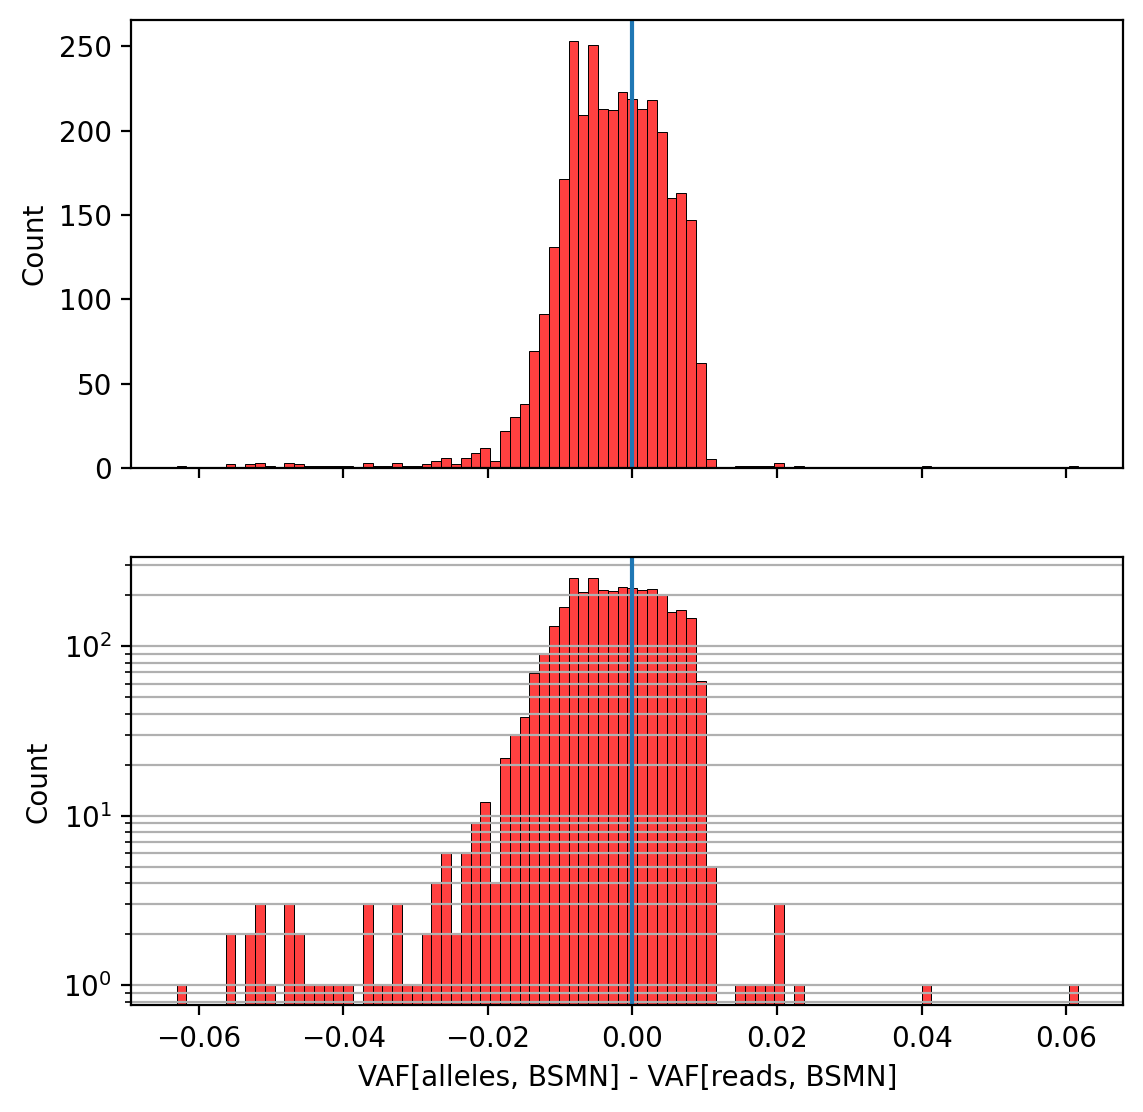

In [16]:
fig, ax = my_histplot(mycalls['VAF[alleles, BSMN]'] - mycalls['VAF[reads, BSMN]'])
ax[1].set_xlabel('VAF[alleles, BSMN] - VAF[reads, BSMN]')
attila_utils.savefig(fig, 'VAF-alleles-BSMN-vs-VAF-reads-BSMN')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

['named-figure/comparing-three-VAF-estimators.png',
 'named-figure/comparing-three-VAF-estimators.pdf']

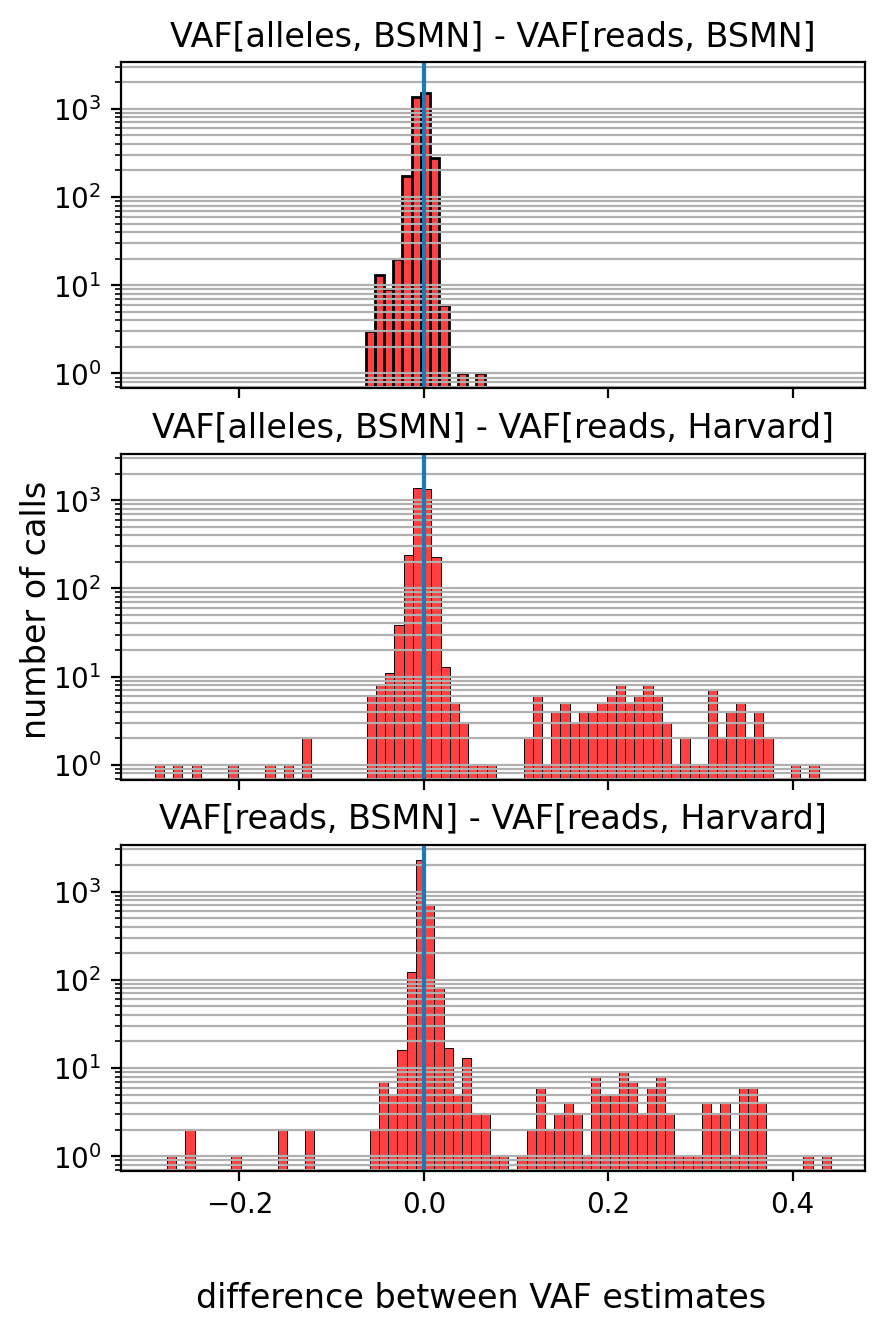

In [17]:
comparisons = [
    ['VAF[alleles, BSMN]', 'VAF[reads, BSMN]'],
    ['VAF[alleles, BSMN]', 'VAF[reads, Harvard]'],
    ['VAF[reads, BSMN]', 'VAF[reads, Harvard]'],
]

fig, ax = plt.subplots(len(comparisons), 1, sharex=True, sharey=True, figsize=(4.8, 7.2))

for axi, comparison in zip(ax, comparisons):
    VAF_A, VAF_B = comparison
    data = mycalls[VAF_A] - mycalls[VAF_B]
    sns.histplot(data=data, ax=axi, color='red', binwidth=0.01)
    axi.set_yscale('log')
    axi.axvline(0)
    axi.grid(axis='y', which='both')
    axi.set_title(VAF_A + ' - ' + VAF_B)
    axi.set_ylabel('')

fig.supylabel('number of calls')
fig.supxlabel('difference between VAF estimates')
attila_utils.savefig(fig, 'comparing-three-VAF-estimators')

/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/attila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

['named-figure/comparing-three-VAF-estimators-scatter.png',
 'named-figure/comparing-three-VAF-estimators-scatter.pdf']

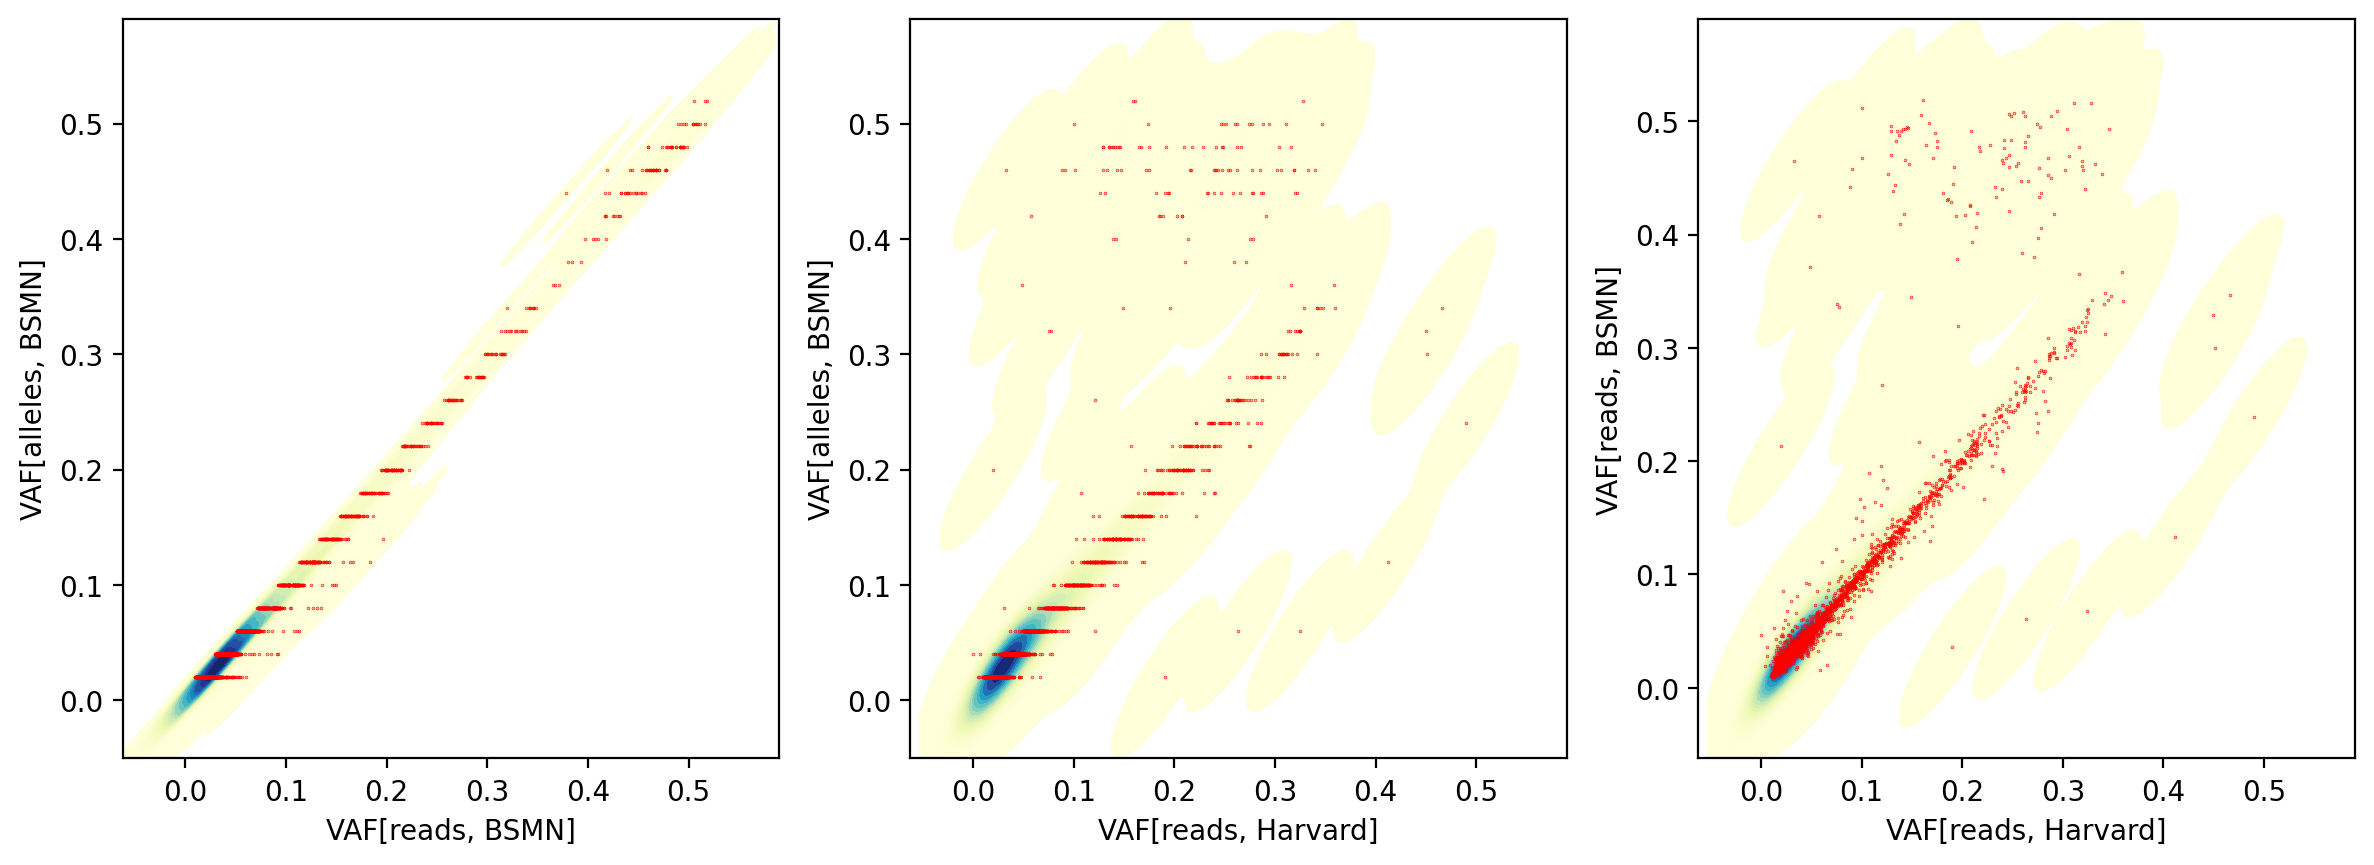

In [18]:
fig, ax = plt.subplots(1, len(comparisons), sharex=True, sharey=False, figsize=(3 * 4.8, 4.8))

for axi, comparison in zip(ax, comparisons):
    VAF_A, VAF_B = comparison
    sns.kdeplot(y=VAF_A, x=VAF_B, data=mycalls, ax=axi, fill=True, levels=np.exp(np.linspace(-10, 0, num=100)), cmap='YlGnBu')
    axi.scatter(y=VAF_A, x=VAF_B, s=0.2, data=mycalls, marker='.', color='red')
    axi.set_ylabel(VAF_A)
    axi.set_xlabel(VAF_B)

attila_utils.savefig(fig, 'comparing-three-VAF-estimators-scatter')

In [19]:
%connect_info

{
  "shell_port": 54755,
  "iopub_port": 41799,
  "stdin_port": 59671,
  "control_port": 47883,
  "hb_port": 33497,
  "ip": "127.0.0.1",
  "key": "875fd059-eb9c96227ca8fde1d1dcc039",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-deded615-118f-4cb9-b883-f92081df7739.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
